<a href="https://colab.research.google.com/github/scratchcatnuvola/WikipediaPage_Generator/blob/main/Wikipedia_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# @title Step 1: Prepare repo
# Run this cell to download and unzip the working folder and install Java 8

from IPython.display import clear_output, HTML, display
import os
import shutil

root_folder = '/content'

# clone main repo
! git clone https://github.com/mille-s/DCU_TCD_FORGe_WebNLG23.git
# Delete locally to avoid confusion
! rm 'DCU_TCD_FORGe_WebNLG23/DCU_TCD_FORGe_WebNLG23.ipynb'

# clone M-FleNS repo (generation pipeline)
! git clone https://github.com/mille-s/M-FleNS_NLG-Pipeline.git
# Delete locally to avoid confusion
! rm 'M-FleNS_NLG-Pipeline/M_FleNS_pipe_v2.ipynb'

# clone wikipedia page generator repo
! git clone https://github.com/mille-s/WikipediaPage_Generator.git
# Delete locally to avoid confusion
! rm 'WikipediaPage_Generator/Wikipedia_generator.ipynb'

# Unzip FORGe
zipForge = os.path.join(root_folder, 'M-FleNS_NLG-Pipeline', 'code', 'FORGe_colab_v4.zip')
! unzip {zipForge} -d {root_folder}

# Unzip triple to predArg conversion
triple2predArg = os.path.join(root_folder, 'triples2predArg')
os.makedirs(triple2predArg)
zipPredArg =  os.path.join(root_folder, 'WikipediaPage_Generator', 'code', 'triples2predArg.zip')
! unzip {zipPredArg} -d {triple2predArg}
triple2Conll_jar = os.path.join(triple2predArg, 'webNLG_triples2conll.jar')

# Unzip Morphology generator
morph_folder_name = 'test_irish_morph_gen_v5.0'
zipMorph = os.path.join(root_folder, 'DCU_TCD_FORGe_WebNLG23', 'code', morph_folder_name+'.zip')
! unzip {zipMorph} -d {root_folder}
morph_input_folder = os.path.join(root_folder, morph_folder_name, 'Inputs')
morph_output_folder = os.path.join(root_folder, morph_folder_name, 'Outputs')
os.makedirs(morph_input_folder)
os.makedirs(morph_output_folder)
# Make morphology flookup executable
! 7z a -sfx {morph_folder_name}'/flookup.exe' {morph_folder_name}'/flookup'
! chmod 755 {morph_folder_name}'/flookup'

# Unzip mock Wikipedia headers
zipWikiImg = os.path.join(root_folder, 'WikipediaPage_Generator', 'code', 'wikipedia-images.zip')
! unzip {zipWikiImg} -d {triple2predArg}

# Install SPARQLWrapper and download list of properties
! pip install SPARQLWrapper
props_list_path = os.path.join(root_folder, 'DCU_TCD_FORGe_WebNLG23', 'code', 'sorted_properties.txt')

clear_output()
print('Working folder ready!\n--------------\nInstalling Java 8...\n')

# Switch to Java 1.8 (needed for FORGe to run correctly)
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
  !java -version       #check java version
install_java()

# To wrap texts in cells
def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))

get_ipython().events.register('pre_run_cell', set_css)

fatal: destination path 'DCU_TCD_FORGe_WebNLG23' already exists and is not an empty directory.
rm: cannot remove 'DCU_TCD_FORGe_WebNLG23/DCU_TCD_FORGe_WebNLG23.ipynb': No such file or directory
fatal: destination path 'M-FleNS_NLG-Pipeline' already exists and is not an empty directory.
rm: cannot remove 'M-FleNS_NLG-Pipeline/M_FleNS_pipe_v2.ipynb': No such file or directory
fatal: destination path 'WikipediaPage_Generator' already exists and is not an empty directory.
rm: cannot remove 'WikipediaPage_Generator/Wikipedia_generator.ipynb': No such file or directory
Archive:  /content/M-FleNS_NLG-Pipeline/code/FORGe_colab_v4.zip
replace /content/FORGe/201005_dev_3tr_sml_EN.conll? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/FORGe/201005_dev_3tr_sml_EN.conll  
  inflating: /content/FORGe/230823_dev_4tr_sml_GA.conll  
  inflating: /content/FORGe/buddy-patched.jar  
  inflating: /content/FORGe/buddy_project/dict/concepticon.dic  
  inflating: /content/FORGe/buddy_project/dic

FileExistsError: [Errno 17] File exists: '/content/triples2predArg'

In [44]:
# Unzip triple to predArg conversion
triple2predArg = os.path.join(root_folder, 'triples2predArg')
# Check if the directory exists, and only create it if it doesn't
if not os.path.exists(triple2predArg):
  os.makedirs(triple2predArg)
zipPredArg =  os.path.join(root_folder, 'WikipediaPage_Generator', 'code', 'triples2predArg.zip')
! unzip {zipPredArg} -d {triple2predArg}
triple2Conll_jar = os.path.join(triple2predArg, 'webNLG_triples2conll.jar')

Archive:  /content/WikipediaPage_Generator/code/triples2predArg.zip
replace /content/triples2predArg/221130_WebNLG23_GA.conll? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/triples2predArg/221130_WebNLG23_GA.conll  
  inflating: /content/triples2predArg/230528-WebNLG23_EN-GA_properties.txt  
  inflating: /content/triples2predArg/230528-WebNLG23_EN.conll  
  inflating: /content/triples2predArg/classMembership/all_objValues.txt  
  inflating: /content/triples2predArg/classMembership/all_subValues.txt  
  inflating: /content/triples2predArg/classMembership/band_obj_all_validated.txt  
 extracting: /content/triples2predArg/classMembership/band_sub_all_validated.txt  
  inflating: /content/triples2predArg/classMembership/band_validated - Copy.txt  
  inflating: /content/triples2predArg/classMembership/female_obj_all_validated.txt  
  inflating: /content/triples2predArg/classMembership/female_sub_all_validated.txt  
  inflating: /content/triples2predArg/classMembership/obj_ba

In [11]:
# Unzip triple to predArg conversion
triple2predArg = os.path.join(root_folder, 'triples2predArg')
# Check if the directory exists, and only create it if it doesn't
if not os.path.exists(triple2predArg):
  os.makedirs(triple2predArg)
zipPredArg =  os.path.join(root_folder, 'WikipediaPage_Generator', 'code', 'triples2predArg.zip')
! unzip {zipPredArg} -d {triple2predArg}
triple2Conll_jar = os.path.join(triple2predArg, 'webNLG_triples2conll.jar')

Archive:  /content/WikipediaPage_Generator/code/triples2predArg.zip
replace /content/triples2predArg/221130_WebNLG23_GA.conll? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/triples2predArg/221130_WebNLG23_GA.conll  
  inflating: /content/triples2predArg/230528-WebNLG23_EN-GA_properties.txt  
  inflating: /content/triples2predArg/230528-WebNLG23_EN.conll  
  inflating: /content/triples2predArg/classMembership/all_objValues.txt  
  inflating: /content/triples2predArg/classMembership/all_subValues.txt  
  inflating: /content/triples2predArg/classMembership/band_obj_all_validated.txt  
 extracting: /content/triples2predArg/classMembership/band_sub_all_validated.txt  
  inflating: /content/triples2predArg/classMembership/band_validated - Copy.txt  
  inflating: /content/triples2predArg/classMembership/female_obj_all_validated.txt  
  inflating: /content/triples2predArg/classMembership/female_sub_all_validated.txt  
  inflating: /content/triples2predArg/classMembership/obj_ba

# Step 2: Get DBpedia properties associated with an entity name

In [32]:
# @title Set parameters

############# Type entity #############
name = 'The Raspberry Pi Foundation'#@param {type:"string"}
entity_name = ('_').join(name.split(' '))

############# Select class #############
category = 'Company'#@param['Unknown', 'Airport', 'Artist', 'Astronaut', 'Athlete', 'Building', 'CelestialBody', 'City', 'ComicsCharacter', 'Company', 'Film', 'Food', 'MeanOfTransportation', 'Monument', 'MusicalWork', 'Politician', 'Scientist', 'SportsTeam', 'University', 'WrittenWork']
input_category = category

############# Select language #############
language = 'EN' #@param['EN', 'ES', 'GA']

############# Triple source #############
# To select where to get the triples from. Ontology is supposed to be cleaner but have less coverage.
triple_source = 'Infobox' #@param['Ontology', 'Infobox']

############# Set properties to discard #############
ignore_properties = 'width, title'#@param {type:"string"}
# print(ignore_properties_list)

############# Select module grouping #############
# Group consecutive modules for the same system or call each module separately.
# Select 'no' to get all intermediate representations, 'yes' if you're only interested in the output.
generate_intermediate_representations = 'no' #@param['yes', 'no']
group_modules_prm = ''
if generate_intermediate_representations == 'yes':
  group_modules_prm = 'no'
else:
  group_modules_prm = 'yes'

############# Select dataset split #############
split = "test" #@param['dev', 'test','train','ukn']

# print('Parameters set!')
# print(entity_name)
# print(input_category)
# print(ignore_properties_list)

In [13]:
# @title Get DBpedia properties online
import os
import codecs
import pickle
import pandas as pd
import ipywidgets as widgets
from ipywidgets import Layout
from WikipediaPage_Generator.code.queryDBpediaProps import get_dbpedia_properties

# Format properties for passing as argument to python module
list_triple_objects, list_propObj, list_obj = get_dbpedia_properties(props_list_path, entity_name, triple_source, ignore_properties)

# Create property selector
selected_properties = widgets.SelectMultiple(
    options=list_propObj,
    value=[],
    rows=len(list_propObj),
    description='Properties',
    layout=Layout(width='642px'),
    disabled=False
)
display(selected_properties)

SelectMultiple(description='Properties', layout=Layout(width='642px'), options=(), rows=0, value=())

# Step 3: Generate text (18 cells)

## Generation parameters

In [21]:
print(selected_properties)

SelectMultiple(description='Properties', layout=Layout(width='642px'), options=(), rows=0, value=())


In [15]:
#######################################################################

# Modules to run, with type of processing (FORGe, Model1, SimpleNLG, etc.).
# Only FORGe is supported for this prototype version.
PredArg_Normalisation = 'FORGe'
# To have an external module assigning triples to aggregate
PredArg_AggregationMark = 'None'
PredArg_Aggregation = 'FORGe'
PredArg_PoSTagging = 'FORGe'
PredArg_CommStructuring = 'FORGe'
DSynt_Structuring = 'FORGe'
SSynt_Structuring = 'FORGe'
SSynt_Aggregation = 'FORGe'
RE_Generation = 'FORGe'
DMorph_AgreementsLinearisation = 'FORGe'
SMorph_Processing = 'FORGe'

#######################################################################
# Paths to python files
path_MFleNS = os.path.join(root_folder, 'M-FleNS_NLG-Pipeline', 'code', 'M-FleNS.py')
path_checkOutputs = os.path.join(root_folder, 'M-FleNS_NLG-Pipeline', 'code', 'M-FleNS-checkOutputs.py')
path_postProc = os.path.join(root_folder, 'M-FleNS_NLG-Pipeline', 'code', 'postProcess.py')
path_FORGe2Morph = os.path.join(root_folder, 'DCU_TCD_FORGe_WebNLG23', 'code', 'FORGe2Morph.py')
path_concatenate = os.path.join(root_folder, 'M-FleNS_NLG-Pipeline', 'code', 'concatenate_files.py')
path_getClassGenderDBp = os.path.join(root_folder, 'M-FleNS_NLG-Pipeline', 'code', 'getClassGenderDBpedia.py')
# path_MorphGen = '/content/DCU_TCD_FORGe_WebNLG23/code/IrishNLP_MorphGen.py'

#######################################################################
# Paths to FORGe/MATE folders and property files
FORGe_input_folder = os.path.join(root_folder, 'FORGe', 'buddy_project', 'struct')
path_MATE = os.path.join(root_folder, 'FORGe', 'buddy-patched.jar')
path_props_resources_template = os.path.join(root_folder, 'FORGe', 'mateColabDrive.properties')
path_props_levels = os.path.join(root_folder, 'FORGe', 'mateLevels.properties')
path_props = os.path.join(root_folder, 'FORGe', '/mate.properties')

# Paths to general folders
# The input structure(s) of the correct type should be placed in the folder that corresponds to the first module called in the next cell
path_strs = os.path.join(root_folder, 'FORGe', 'structures')
str_PredArg_folder = os.path.join(path_strs, '00-PredArg')
str_PredArgNorm_folder = os.path.join(path_strs, '01-PredArgNorm')
str_PredArgAggMark_folder = os.path.join(path_strs, '02-PredArgAggMark')
str_PredArgAgg_folder = os.path.join(path_strs, '03-PredArgAgg')
str_PredArgPoS_folder = os.path.join(path_strs, '04-PredArgPoS')
str_PredArgComm_folder = os.path.join(path_strs, '05-PredArgComm')
str_DSynt_folder = os.path.join(path_strs, '06-DSynt')
str_SSynt_folder = os.path.join(path_strs, '07-SSynt')
str_SSyntAgg_folder = os.path.join(path_strs, '08-SSyntAgg')
str_REG_folder = os.path.join(path_strs, '09-REG')
str_DMorphLin_folder = os.path.join(path_strs, '10-DMorphLin')
str_SMorphText_folder = os.path.join(path_strs, '11-SMorphText')
log_folder = os.path.join(root_folder, 'FORGe', 'log')
if not os.path.exists(log_folder):
  os.makedirs(log_folder)
temp_input_folder_morph = os.path.join(root_folder, 'FORGe-out')
if not os.path.exists(temp_input_folder_morph):
  os.makedirs(temp_input_folder_morph)

## Step 3.1: Convert DBpedia triples to linguistic structures

In [22]:
#@title Convert chosen triples to XML and create LLM prompt
from WikipediaPage_Generator.code.utils import get_prop_index_from_table, removeReservedCharsFileName, create_xml, create_GPT_Prompt

# Generate list of indices of properties selected by user (index in the list of Triple objects that contains all retrieved triples)
properties_selected_by_user = get_prop_index_from_table(selected_properties, list_triple_objects)

# create xml file and retrieve the list of triples in a text format to build a ChatGPT query, saved in GPT_prompt_{entity}.txt on the left
list_triples_text = create_xml(list_triple_objects, properties_selected_by_user, input_category, triple2predArg)

# Create a text file that contains a prompt that can be used to produce another version of the current text with GPT.
create_GPT_Prompt(entity_name, language, list_triples_text, '/content')

In [23]:
#@title Get and write class and gender information from DBpedia
from WikipediaPage_Generator.code.utils import create_jsons_SubjAndObj

# Create json files for entities we need to query DBpedia about
filepath_subj, filepath_obj = create_jsons_SubjAndObj(entity_name, list_obj, triple2predArg)
# Get class and gender via DBpedia query
! python {path_getClassGenderDBp} {filepath_subj} {filepath_obj} {root_folder}

Querying DBpedia for subjects of input triples...
/ |#                                                  | 0 Elapsed Time: 0:00:00
No objects to query.


Band-sbj: []
Band-obj: []
Fem-sbj: []
Fem-obj: []
Per-sbj: []
Per-obj: []


In [24]:
#@title  Create FORGe input file (conll format)
import shutil
from WikipediaPage_Generator.code.utils import prepare_variables_xml2CoNLL_conversion

# Get all variables
new_triple2predArg, name_conll_templates, path_t2p_out, language_t2p, newEntityName = prepare_variables_xml2CoNLL_conversion(str_PredArg_folder, language, entity_name, triple2predArg)
# Convert xml into predArg
!java -jar {triple2Conll_jar} {new_triple2predArg} {name_conll_templates} '230528-WebNLG23_EN-GA_properties.txt' {path_t2p_out} {language_t2p} {newEntityName}  # -> "log.txt"

# Copy conll file to FORGe input folder
shutil.copy(os.path.join(path_t2p_out, newEntityName+'_'+language_t2p+'.conll'), str_PredArg_folder)

Exception in thread "main" java.io.FileNotFoundException: File '/content/triples2predArg/The_Radpberry_Pi_Foundation.xml' does not exist
	at org.apache.commons.io.FileUtils.openInputStream(FileUtils.java:299)
	at org.apache.commons.io.FileUtils.readFileToString(FileUtils.java:1711)
	at org.apache.commons.io.FileUtils.readFileToString(FileUtils.java:1734)
	at dbpedia2NL.webNLG_20.ReadProperties.getEntryTriples(ReadProperties.java:49)
	at dbpedia2NL.webNLG_20.Triples2Conll.Triples2Conll(Triples2Conll.java:72)
	at dbpedia2NL.webNLG_20.Triples2Conll.main(Triples2Conll.java:14)


FileNotFoundError: [Errno 2] No such file or directory: '/content/triples2predArg/out/The_Radpberry_Pi_Foundation_en.conll'

In [ ]:
!java -jar {triple2Conll_jar} {new_triple2predArg} {name_conll_templates} '230528-WebNLG23_EN-GA_properties.txt' {path_t2p_out} {language_t2p} {newEntityName}  # -> "log.txt"

In [ ]:
#@title  Create FORGe input file (conll format)
import shutil
from WikipediaPage_Generator.code.utils import prepare_variables_xml2CoNLL_conversion

# Get all variables
new_triple2predArg, name_conll_templates, path_t2p_out, language_t2p, newEntityName = prepare_variables_xml2CoNLL_conversion(str_PredArg_folder, language, entity_name, triple2predArg)
# Convert xml into predArg
!java -jar {triple2Conll_jar} {new_triple2predArg} {name_conll_templates} '230528-WebNLG23_EN-GA_properties.txt' {path_t2p_out} {language_t2p} {newEntityName}  # -> "log.txt"

# Check if the conll file was generated
conll_file_path = os.path.join(path_t2p_out, newEntityName + '_' + language_t2p + '.conll')
if os.path.exists(conll_file_path):
  # Copy conll file to FORGe input folder
  shutil.copy(conll_file_path, str_PredArg_folder)
else:
  print(f"Error: Conll file not found at {conll_file_path}")
  # Add debugging or error handling logic here

## Step 3.2: Convert linguistic structures into non-inflected Irish text (FORGe generator)

In [ ]:
#@title  Launch generation process
! python {path_MFleNS} {language} {split} {group_modules_prm} {PredArg_Normalisation} {PredArg_AggregationMark} {PredArg_Aggregation} {PredArg_PoSTagging} {PredArg_CommStructuring} {DSynt_Structuring} {SSynt_Structuring} {SSynt_Aggregation} {RE_Generation} {DMorph_AgreementsLinearisation} {SMorph_Processing} {FORGe_input_folder} {path_MATE} {path_props_resources_template} {path_props_levels} {path_props} {str_PredArg_folder} {str_PredArgNorm_folder} {str_PredArgAggMark_folder} {str_PredArgAgg_folder} {str_PredArgPoS_folder} {str_PredArgComm_folder} {str_DSynt_folder} {str_SSynt_folder} {str_SSyntAgg_folder} {str_REG_folder} {str_DMorphLin_folder} {str_SMorphText_folder} {log_folder}


In [ ]:
#@title Check outputs and copy files to morph folder
from WikipediaPage_Generator.code.utils import clear_folder

! python {path_checkOutputs} {str_PredArg_folder} {str_SMorphText_folder} {log_folder} {temp_input_folder_morph} {language}

if not language == 'GA':
  clear_folder(os.path.join(temp_input_folder_morph, split))
  # For GA, files are copied from the python code called above
  ! python {path_concatenate} {str_SMorphText_folder} {temp_input_folder_morph} {split}

## Step 3.3: Inflect Irish text (Irish NLP tools)

In [40]:
#@title Process raw FORGe output and format it for Morphology
from WikipediaPage_Generator.code.utils import clear_files, count_expected_texts

count_strs_all_FORGe = count_expected_texts(root_folder)
print('Expected texts: '+str(count_strs_all_FORGe)+'.\n')

if language == 'GA':
  ! python {path_FORGe2Morph} {language} {temp_input_folder_morph} {morph_input_folder}
  clear_files(temp_input_folder_morph)

Expected texts: 0.



In [26]:
#@title  Launch generation process
! python {path_MFleNS} {language} {split} {group_modules_prm} {PredArg_Normalisation} {PredArg_AggregationMark} {PredArg_Aggregation} {PredArg_PoSTagging} {PredArg_CommStructuring} {DSynt_Structuring} {SSynt_Structuring} {SSynt_Aggregation} {RE_Generation} {DMorph_AgreementsLinearisation} {SMorph_Processing} {FORGe_input_folder} {path_MATE} {path_props_resources_template} {path_props_levels} {path_props} {str_PredArg_folder} {str_PredArgNorm_folder} {str_PredArgAggMark_folder} {str_PredArgAgg_folder} {str_PredArgPoS_folder} {str_PredArgComm_folder} {str_DSynt_folder} {str_SSynt_folder} {str_SSyntAgg_folder} {str_REG_folder} {str_DMorphLin_folder} {str_SMorphText_folder} {log_folder}

# Check if summary.txt exists, and if not, create an empty one
summary_file_path = os.path.join(root_folder, 'FORGe', 'log', 'summary.txt')
if not os.path.exists(summary_file_path):
  with open(summary_file_path, 'w') as f:
    pass # Create an empty file if it doesn't exist

Preparing generation pipeline...
  -> Initial structure is ['PredArg'].
  -> 10 modules were selected.
  -> Sequence: ['PredArgNorm', 'PredArgAgg', 'PredArgPoS', 'PredArgComm', 'DSynt', 'SSynt', 'SSyntAgg', 'REG', 'DMorphLin', 'SMorphText']
  -> The pipeline looks good, proceeding...
--------------------------
Running FORGe
--------------------------
  Running ['10_Con_Sem.rl', '11.1_Con_Agg1.rl', '11.2_Con_Agg2.rl', '11.3_Con_Agg3.rl', '11.4_Con_Agg4.rl', '13_Sem_SemPoS.rl', '15_SemPoS_SemCommMark.rl', '17_SemCommMark_SemComm.rl', '20_SemComm_DSynt.rl', '30_DSynt_SSynt.rl', '35_SSynt_PostProc.rl', '37.1_SSynt_Agg1.rl', '37.2_SSynt_Agg2.rl', '38.1_SSynt_REG1.rl', '38.2_SSynt_REG2.rl', '40_SSynt_DMorph_linearize.rl', '50_DMorph_SMorph.rl', '60_Smorph_Sentence.rl'] on files in /content/FORGe/structures/00-PredArg...
All done!


In [27]:
#@title Run the morphology generation
from DCU_TCD_FORGe_WebNLG23.code.GA_inflect import run_GA_morphGen

show_input = False #@param {type:"boolean"}

if language == 'GA':
  run_GA_morphGen(root_folder, morph_folder_name, morph_input_folder, morph_output_folder, count_strs_all_FORGe, show_input)

## Step 3.4: Post-process output

In [41]:
#@title Process texts
from WikipediaPage_Generator.code.utils import check_postProcessed_outputs

prefinal_output_folder = ''
if language == 'GA':
  prefinal_output_folder = morph_output_folder
else:
  prefinal_output_folder = os.path.join(temp_input_folder_morph, split)

# Post-process texts
! python {path_postProc} {language} {prefinal_output_folder}

# Check post-processed texts
check_postProcessed_outputs(root_folder, prefinal_output_folder, count_strs_all_FORGe)


There are 0 texts.
Texts per file: []


In [34]:
#@title Process texts
from WikipediaPage_Generator.code.utils import check_postProcessed_outputs, count_expected_texts # Import count_expected_texts here

prefinal_output_folder = ''
if language == 'GA':
  prefinal_output_folder = morph_output_folder
else:
  prefinal_output_folder = os.path.join(temp_input_folder_morph, split)

# Get the count of expected texts
count_strs_all_FORGe = count_expected_texts(root_folder)  # Calculate the value here

# Post-process texts
! python {path_postProc} {language} {prefinal_output_folder}

# Check post-processed texts
check_postProcessed_outputs(root_folder, prefinal_output_folder, count_strs_all_FORGe)


There are 0 texts.
Texts per file: []


In [29]:
#@title Process texts
from WikipediaPage_Generator.code.utils import check_postProcessed_outputs, count_expected_texts # Import count_expected_texts here

prefinal_output_folder = ''
if language == 'GA':
  prefinal_output_folder = morph_output_folder
else:
  prefinal_output_folder = os.path.join(temp_input_folder_morph, split)

# Get the count of expected texts
count_strs_all_FORGe = count_expected_texts(root_folder)  # Calculate the value here

# Post-process texts
! python {path_postProc} {language} {prefinal_output_folder}

# Check post-processed texts
check_postProcessed_outputs(root_folder, prefinal_output_folder, count_strs_all_FORGe)


There are 0 texts.
Texts per file: []


In [46]:
#@title Concatenate files
# import glob
from WikipediaPage_Generator.code.utils import concatenate_files_UI

filename = concatenate_files_UI(root_folder, morph_output_folder, temp_input_folder_morph, split, language, count_strs_all_FORGe, entity_name, '/content')

[]

There are 0 texts.


In [36]:
#@title Zip and download FORGE output folder and intermediate representations
# from google.colab import files
# zip_name_inter = '/content/WebNLG_['+language+']_['+split+']_allLevels.zip'
# !zip -r {zip_name_inter} /content/FORGe/structures

# clear_output()

# files.download(zip_name_inter)

In [37]:
#@title Zip and download FORGe log files folder
# from google.colab import files
# zip_name_log = '/content/WebNLG_['+language+']_['+split+']_logs.zip'
# !zip -r {zip_name_log} /content/FORGe/log

# clear_output()

# files.download(zip_name_log)

# Step 4: Show text - You can download the *_EN.txt or *_GA.txt file at the bottom on the leftside

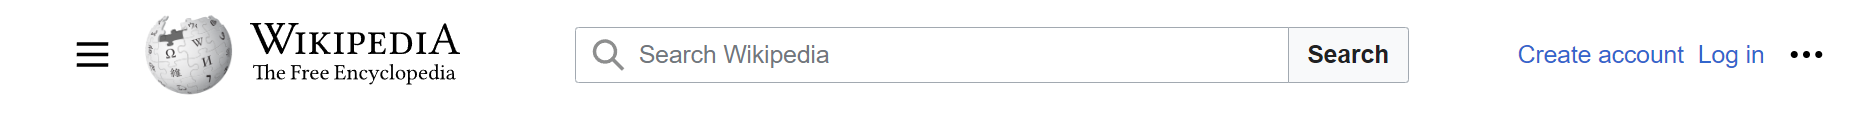

#The Raspberry Pi Foundation

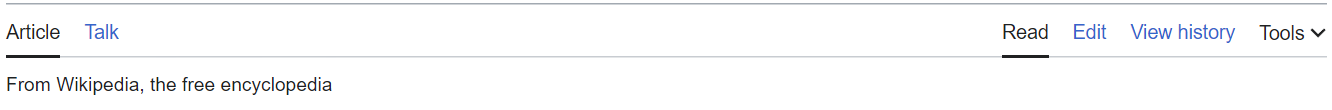

In [47]:
#@title Show text
from IPython.display import Image, display, Markdown

display(Image('/content/triples2predArg/wikipedia-header.png', width=1400, height=82))
title = '#'+name+''
display(Markdown(title))
display(Image('/content/triples2predArg/wikipedia-subheader.png', width=1110, height=82))

with codecs.open(filename, 'r', 'utf-8') as text:
  for line in text:
    print(line)